<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

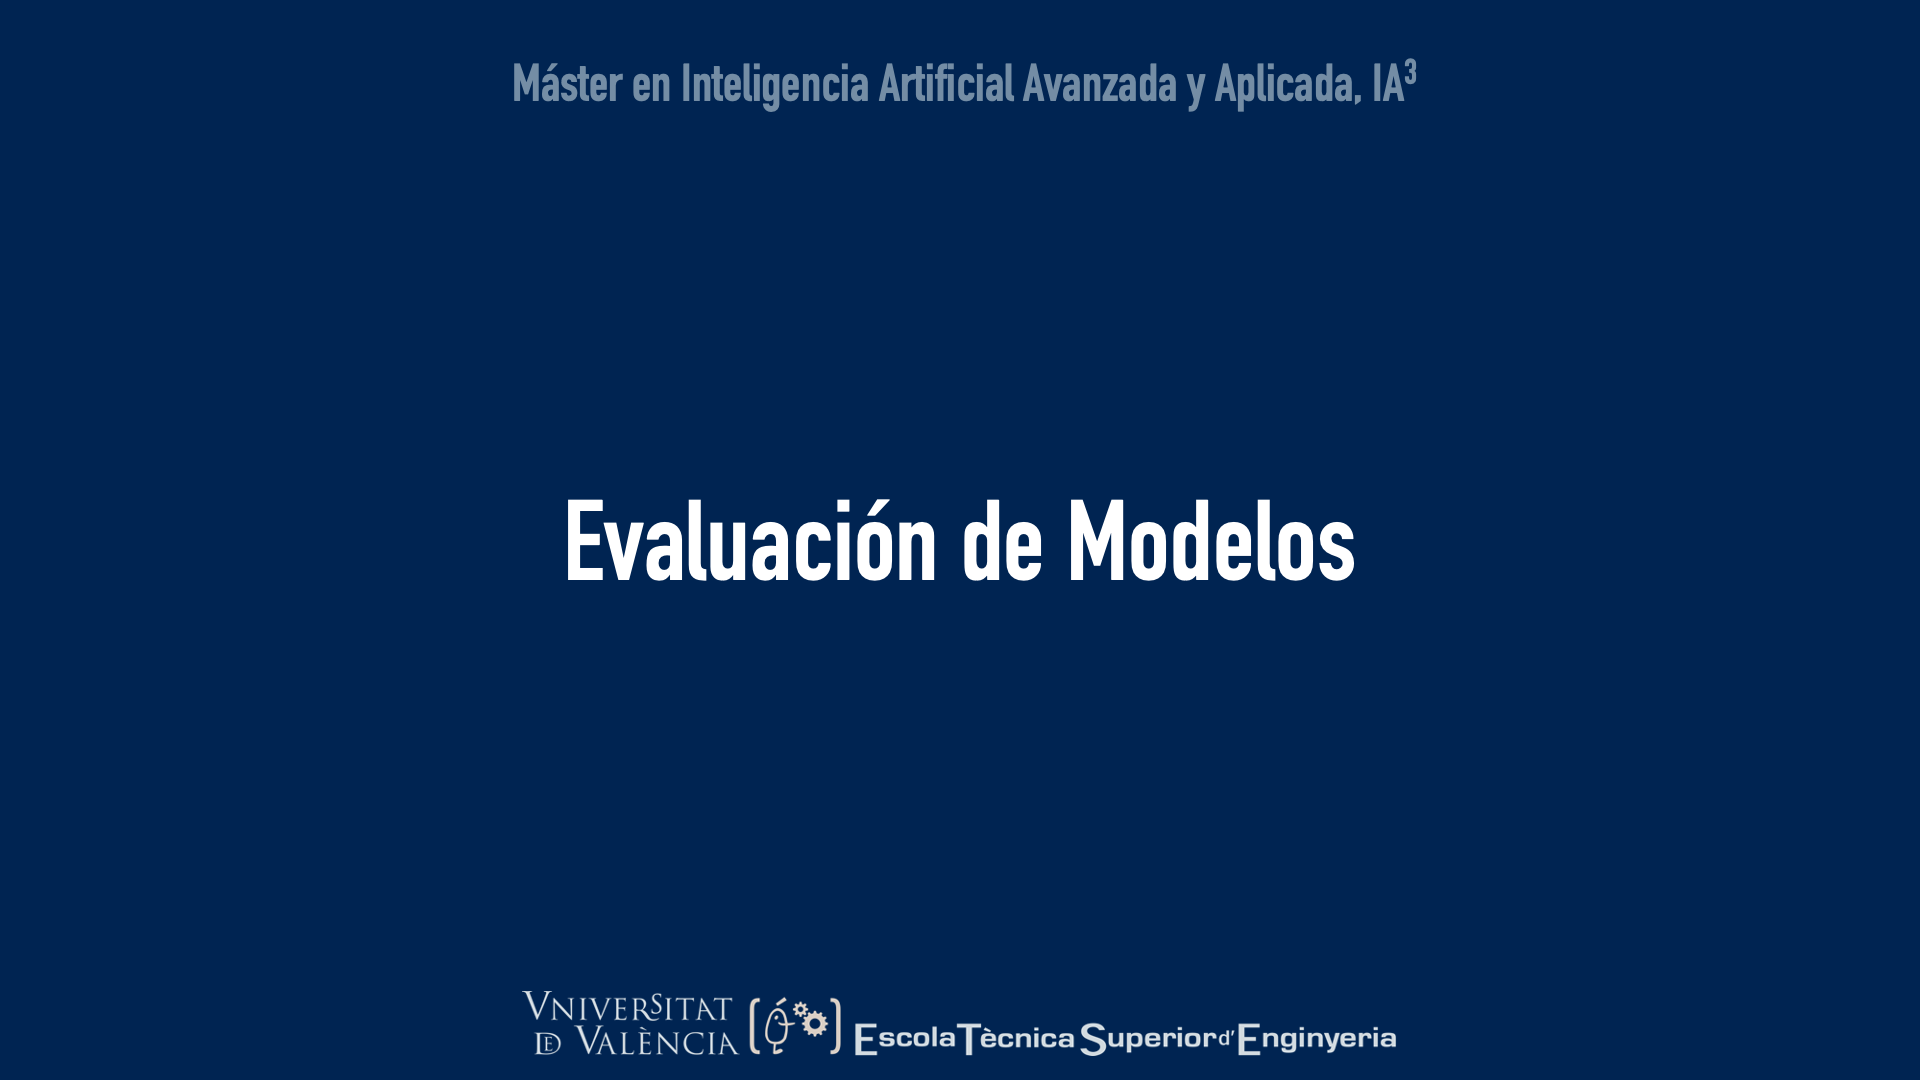

Antes de comenzar a estudiar los modelos de bagging. Repasemos las diferentes métricas de evaluación que podemos utilizar para medir el rendimiento de nuestro modelo. Es importante matizar, que estas métricas están construídas para evaluar los resultados en función de las características de nuestro dataset.


Algunas de las métricas disponibles son:

- Accuracy: Esta métrica mide el número total de aciertos sobre el total de casos. En general suele ser la métrica por defecto en la mayoría de paquetes. Es una métrica poco precisa si existe desbalanceo de clases (las ocurrencias de una clase son mucho más frecuentes frente a otra).

$$\frac{tp+tn}{tp+fn+tn+fp}$$

- Precision: Esta métrica mide el total de casos positivos frente al total de casos positivos resultados de la predicción del algoritmo. Esta métrica arroja una visión sobre la proporción de aciertos en nuestra predicción. Toma especial importancia si la ocurrencia de un positivo acarrea un gasto, por ejemplo, si esto produce una orden de trabajo en una fábrica.

$$\frac{tp}{tp+fp}$$

- Recall: Mide el total de casos positivos correctamente clasisificados frente al total de casos positivos de una determinada clase. Es una métrica especialmente útil cuando la clasificación de uno de los eventos es importante para el éxito del algoritmo, por ejemplo, en medicina.

$$\frac{tp}{tp+fn}$$

- F1-Score: Es la media entre precision y recall y toma en cuenta ambos parámetros. Esta métrica puede adaptarse a problemas de clases imbalanceados al tener en cuenta la proporción de la clase que se está tratando.

$$\frac{tp}{tp+0.5*(fn+fp)}$$


# Ejercicio

Construye un modelo cualquiera de clasificación para el dataset pinguins. Consulta la documentación de sklearn y calcula todas las métricas descritas anteriormente.

https://scikit-learn.org/stable/modules/model_evaluation.html

Concluye que métrica se adapta mejor al problema que tratamos de resolver.

Otra métrica especialmente importante es el área bajo la curva roc. La curva roc mide la progresión de verdaderos positivos conforme aumenta el número de falsos positivos. De esta manera se representa como reacciona el modelo conforme el umbral de clasificación se va haciendo más laxo. Esta curva siempre comienza en el punto (0,0) y acaba en el (1,1) y lo ideal es conseguir alcanzar el máximo de true positives en un punto temprano de la curva.

In [205]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px

In [156]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [157]:
dummies = pd.get_dummies(dataset.loc[:, ['species', 'island']])
numeric = dataset.select_dtypes('number')
X = pd.concat([dummies, numeric], axis=1)
Y = dataset.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [195]:
model = LogisticRegression(max_iter=2)
model.fit(X_train, Y_train['sex'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
model.score(X_test, Y_test)

0.55

In [197]:
model.classes_

array(['Female', 'Male'], dtype=object)

In [198]:
#Transform into probabilities
new_probs = []
for value in Y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

In [202]:
fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

In [203]:
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,1.536933
1,0.000000,0.018182,0.536933
2,0.000000,0.036364,0.536607
3,0.000000,0.054545,0.536016
4,0.000000,0.072727,0.535984
...,...,...,...
96,0.911111,1.000000,0.519451
97,0.933333,1.000000,0.519288
98,0.955556,1.000000,0.519284
99,0.977778,1.000000,0.518825


In [204]:
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

# Ejercicio

Tunead el modelo anterior y observar los cambios sobre la curva roc conforme el modelo se hace más robusto.

Sin embargo a veces, interesará disponer de un único valor para medir el rendimiento del modelo. En ese caso, es posible calcular el área sobre la curva roc (roc_auc). El área bajo la curva es un buen indicativo de como mejora el crecimiento de los tp frente a los fp.

In [206]:
roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1]))

0.7555555555555555